In [1]:
#Recommendation system using Flipkart dataset
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
df = pd.read_csv('/content/flipkart_com-ecommerce_sample.csv')

In [28]:
df.sample(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
17232,63eefeacb898ab93e03ed36867ac2304,2015-12-20 08:26:17 +0000,http://www.flipkart.com/softspun-microfiber-mu...,Softspun Microfiber Multi-purpose Towel,"[""Home Furnishing >> Bath Linen >> Towels""]",BTWEA4F3G4BNEDHF,401.0,200.0,"[""http://img5a.flixcart.com/image/bath-towel/d...",False,Buy Softspun Microfiber Multi-purpose Towel at...,No rating available,No rating available,Softspun,"{""product_specification""=>[{""key""=>""Material"",..."
8365,6f469a61440933a6718420184d22a104,2016-01-07 05:50:25 +0000,http://www.flipkart.com/first-smart-deal-plant...,First Smart Deal Plant Container Set,"[""Tools & Hardware >> Tools >> Gardening Tools...",PCSEC86VVWZKW4F3,600.0,411.0,"[""http://img5a.flixcart.com/image/plant-contai...",False,Buy First Smart Deal Plant Container Set for R...,No rating available,No rating available,First Smart Deal,"{""product_specification""=>[{""key""=>""Shape"", ""v..."
12181,f77c8e9ec962a78f9668d8a8113666c6,2015-12-30 00:17:46 +0000,http://www.flipkart.com/classique-designer-jew...,Classique Designer Jewellery Alloy Pearl Rhodi...,"[""Jewellery >> Bangles, Bracelets & Armlets >>...",BBAEBEYR9ZATYRZH,2999.0,499.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Classique Designer Jewellery Alloy Pearl Rhodi...,No rating available,No rating available,Classique Designer Jewellery,"{""product_specification""=>[{""key""=>""Pearl Shap..."
15721,21fa7bd10ce9db8882fe09647dd4eb43,2015-12-29 05:07:38 +0000,http://www.flipkart.com/pet-club51-pc237-l-bed...,Pet Club51 PC237 L Pet Bed,"[""Furniture >> Pet Furniture""]",PEBEDMZDWBVBHZNR,3000.0,1549.0,"[""http://img6a.flixcart.com/image/pet-bed/e/b/...",False,Pet Club51 PC237 L Pet Bed (Multicolor)\n ...,No rating available,No rating available,Multicolor,"{""product_specification""=>[{""value""=>""1 Pet Be..."
1689,7985728f03843aed43e19c36753d48f2,2016-01-01 10:55:30 +0000,http://www.flipkart.com/gizmoz-customs-back-co...,"Gizmoz Customs Back Cover for Apple iPad 2, 3, 4","[""Mobiles & Accessories >> Tablet Accessories ...",ACCE9E2RT56M3GSU,2500.0,550.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,Buy Gizmoz Customs Back Cover for Apple iPad 2...,No rating available,No rating available,Gizmoz Customs,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


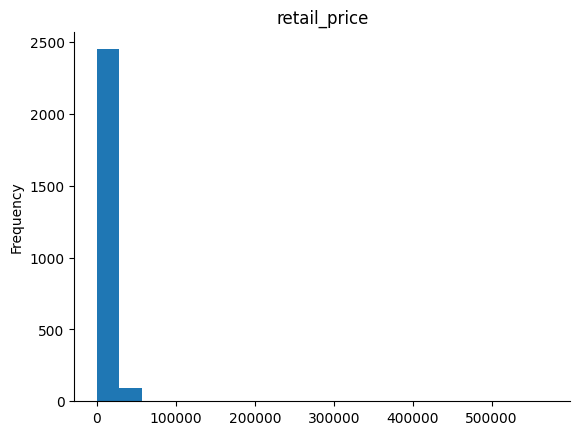

In [5]:
# @title retail_price

from matplotlib import pyplot as plt
df['retail_price'].plot(kind='hist', bins=20, title='retail_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
len(df['product_name'])

2556

In [7]:
len(df['product_name'].unique()),len(df['uniq_id'].unique())

(1637, 2556)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  2556 non-null   object 
 1   crawl_timestamp          2556 non-null   object 
 2   product_url              2556 non-null   object 
 3   product_name             2556 non-null   object 
 4   product_category_tree    2555 non-null   object 
 5   pid                      2555 non-null   object 
 6   retail_price             2549 non-null   float64
 7   discounted_price         2549 non-null   float64
 8   image                    2555 non-null   object 
 9   is_FK_Advantage_product  2555 non-null   object 
 10  description              2554 non-null   object 
 11  product_rating           2555 non-null   object 
 12  overall_rating           2555 non-null   object 
 13  brand                    1895 non-null   object 
 14  product_specifications  

In [9]:
df.describe()

,retail_price,discounted_price
count,2549.000000,2549.000000
mean,4209.389172,3001.558258
std,14567.510195,13666.286536
min,49.000000,49.000000
25%,849.000000,349.000000
50%,1245.000000,599.000000
75%,2100.000000,1119.000000
max,571230.000000,571230.000000


In [10]:
df.shape

(2556, 15)

In [11]:
df['description'][2]

'Key Features of AW Bellies Sandals Wedges Heel Casuals,AW Bellies Price: Rs. 499 Material: Synthetic Lifestyle: Casual Heel Type: Wedge Warranty Type: Manufacturer Product Warranty against manufacturing defects: 30 days Care instructions: Allow your pair of shoes to air and de-odorize at regular basis; use shoe bags to prevent any stains or mildew; dust any dry dirt from the surface using a clean cloth; do not use polish or shiner,Specifications of AW Bellies General Ideal For Women Occasion Casual Shoe Details Color Red Outer Material Patent Leather Heel Height 1 inch Number of Contents in Sales Package Pack of 1 In the Box One Pair Of Shoes'

In [12]:
df.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        1
pid                          1
retail_price                 7
discounted_price             7
image                        1
is_FK_Advantage_product      1
description                  2
product_rating               1
overall_rating               1
brand                      661
product_specifications       5
dtype: int64

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
recom = TfidfVectorizer(max_features = None,
                      strip_accents = 'unicode',
                      analyzer = 'word',
                      min_df = 10,
                      token_pattern = r'\w{1,}',
                      ngram_range=(1,3),
                      stop_words='english')

df['description'] = df['description'].fillna('')

In [14]:
recom_matrix = recom.fit_transform(df['description'])

In [15]:
recom_matrix

<2556x4106 sparse matrix of type '<class 'numpy.float64'>'
	with 176437 stored elements in Compressed Sparse Row format>

In [16]:
recom_matrix.shape

(2556, 4106)

In [17]:
from sklearn.metrics.pairwise import sigmoid_kernel
import pandas as pd
des = sigmoid_kernel(recom_matrix, recom_matrix)

In [18]:
des[0]

array([0.76169642, 0.76159771, 0.76160061, ..., 0.76159725, 0.76159739,
       0.76159416])

In [19]:
ind = pd.Series(df.index,index= df['product_name']).drop_duplicates()

In [20]:
ind.head(30)

product_name
Alisha Solid Women's Cycling Shorts                                       0
FabHomeDecor Fabric Double Sofa Bed                                       1
AW Bellies                                                                2
Alisha Solid Women's Cycling Shorts                                       3
Sicons All Purpose Arnica Dog Shampoo                                     4
Eternal Gandhi Super Series Crystal Paper Weights  with Silver Finish     5
Alisha Solid Women's Cycling Shorts                                       6
FabHomeDecor Fabric Double Sofa Bed                                       7
dilli bazaaar Bellies, Corporate Casuals, Casuals                         8
Alisha Solid Women's Cycling Shorts                                       9
Ladela Bellies                                                           10
Carrel Printed Women's                                                   11
Sicons All Purpose Tea Tree Dog Shampoo                                  12

In [21]:
def recommendation_system(title,des=des):
    index = ind[title]
    # Handle potential multiple indices
    if isinstance(index, pd.Series):
        index = index.iloc[0]  # Select the first index if multiple found
    des_scores = list(enumerate(des[index]))

    des_scores = sorted(des_scores, key= lambda x: x[1], reverse = True)
    des_scores = des_scores[1:11]
    item_indices = [i[0] for i in des_scores]
    return df['product_name'].iloc[item_indices]

In [26]:
user = input("Enter the name of the product: ")
print("\nProducts Recommended for you are: \n")
print(recommendation_system(user).unique())

Enter the name of the product: Madcaps C38GR30 Men's Cargos

Products Recommended for you are: 

["Madcaps C31GR30 Men's Cargos" "SkyStar Cargo Bermuda Men's Cargos"
 "Blimey Convertible Men's Cargos" "Bodymark 768 Men's Cargos"
 "London Bee Black Men's Cargos"
 "Silver Bucks Camouflage Cargo Men's Cargos"
 "J Marks Multicolor Men's Cargos" "Sports 52 Wear Men's Cargos"
 "Sports 52 Wear C1595 Men's Cargos"
 "Life by Shoppers Stop Premium Men's Cargos"]
